In [115]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [128]:
df = pd.read_csv('/home/carolxavier/Documents/pda/sample_data_case.csv')

df

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,total_branches_and_socios,city_state,city_code,zip_code,capital_social,size_company,juri_description,email_provider
0,4363642000106,4363642,MATRIZ,TRES GERACOES EM MODA LTDA,TRES GERACOES,29 de março de 2001,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 6, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,80410200,0.0,NOT_INFORMED,Sociedade Empresária Limitada,NaN
1,17001584000465,17001584,FILIAL,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,20 de setembro de 2018,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 7, 'tot_branches': '4 branches'}",Curitiba - PR,4106902,80610905,100000.0,SMALL_COMPANY,Sociedade Empresária Limitada,HOTMAIL.COM
2,6931423000454,6931423,FILIAL,FONTANA COMERCIO DE JOIAS LTDA,NaN,30 de julho de 2014,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '4 branches'}",Curitiba - PR,4106902,81200240,10000.0,NOT_INFORMED,Sociedade Empresária Limitada,NaN
3,39842321000179,39842321,MATRIZ,ZAZULE ESTACAO CURITIBA LTDA,ZAZULE ESTACAO CURITIBA,19 de novembro de 2020,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,80230903,10000.0,NOT_INFORMED,Sociedade Empresária Limitada,ZAZULE.COM.BR
4,81671679000223,81671679,FILIAL,JOSE PELAYO SANCHEZ & CIA LTDA,PELAYO CASA,09 de outubro de 2013,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '2 branches'}",Londrina - PR,4113700,86020000,50000.0,SMALL_COMPANY,Sociedade Empresária Limitada,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,42023352000102,42023352,MATRIZ,TATIANE DA SILVA DELGADO 07759757964,NaN,20 de maio de 2021,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Castro - PR,4104907,84165000,10000.0,NOT_INFORMED,Empresário (Individual),GMAIL.COM
195,34271269000124,34271269,MATRIZ,JOCELI DEUSCHLE MARTINEZ 99708000949,GESSO ARTISTICO,19 de julho de 2019,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,81510430,10.0,NOT_INFORMED,Empresário (Individual),gmail.com
196,35899122000146,35899122,MATRIZ,AGNES MARIANA MOREIRA NHEMIHES 09242405981,NHEMIHES PRESENTES,06 de janeiro de 2020,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Colombo - PR,4105805,83404690,3000.0,NOT_INFORMED,Empresário (Individual),HOTMAIL.COM
197,41986953000158,41986953,MATRIZ,SERGIO GONCALVES DA SILVA 06774341977,TOCA DO URSO BRINDES,18 de maio de 2021,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,81260080,1000.0,NOT_INFORMED,Empresário (Individual),GMAIL.COM


In [129]:
df.dtypes

document_number                int64
cnpj_basico                    int64
establishment_type            object
razao_social                  object
nome_fantasia                 object
opening_date                  object
cnae                           int64
cnae_description              object
total_branches_and_socios     object
city_state                    object
city_code                      int64
zip_code                       int64
capital_social               float64
size_company                  object
juri_description              object
email_provider                object
dtype: object

In [130]:
# Check for duplicate document numbers and CNPJ
print("Duplicate Document Numbers:", df.duplicated(subset='document_number').sum())
print("Duplicate CNPJ Básico:", df.duplicated(subset='cnpj_basico').sum())

Duplicate Document Numbers: 0
Duplicate CNPJ Básico: 2


In [131]:
duplicate_cnpj_rows = df[df.duplicated(subset='cnpj_basico', keep='first')]
print(duplicate_cnpj_rows)

#It was found that the duplicated values are "filial" and "matriz" regustrations of a company
#Therefore, we'll keep all rows

     document_number  cnpj_basico establishment_type  \
176   25177663000298     25177663             FILIAL   
178   16966844000202     16966844             FILIAL   

                    razao_social nome_fantasia             opening_date  \
176  C. A. DE MOURA - BIJUTERIAS           NaN      30 de julho de 2018   
178   SUELLEN MICHELON GUIMARAES    PETIT BIJU  14 de fevereiro de 2019   

        cnae                                           cnae_description  \
176  4789001  Comércio varejista de suvenires, bijuterias e artesanatos   
178  4789001  Comércio varejista de suvenires, bijuterias e artesanatos   

                           total_branches_and_socios          city_state  \
176  {'tot_socios': 1, 'tot_branches': '2 branches'}        Sarandi - PR   
178  {'tot_socios': 1, 'tot_branches': '2 branches'}  Foz do Iguaçu - PR   

     city_code  zip_code  capital_social  size_company  \
176    4126256  87111120         20000.0  NOT_INFORMED   
178    4108304  85851010          

In [132]:
# Drop rows and columns that are all NA
df = df.dropna(how="all")
num_rows = df.shape[0]
print(num_rows)

# We didn't have any null row

199


In [133]:
# Convert to categorical and handle missing values
df['establishment_type'] = df['establishment_type'].astype('category').cat.as_ordered()
df['cnae'] = df['cnae'].astype('category')
df['juri_description'] = df['juri_description'].astype('category')
df['size_company'] = df['size_company'].astype('category')

In [134]:
# Replace NaN with a placeholder
df['razao_social'].fillna("NOT_INFORMED", inplace=True)
df['nome_fantasia'].fillna("NOT_INFORMED", inplace=True)
df['email_provider'].fillna("NOT_INFORMED", inplace=True)
df['cnae_description'].fillna("NOT_INFORMED", inplace=True)
df['city_code'].fillna(0, inplace=True)
df['zip_code'].fillna(0, inplace=True)

df

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,total_branches_and_socios,city_state,city_code,zip_code,capital_social,size_company,juri_description,email_provider
0,4363642000106,4363642,MATRIZ,TRES GERACOES EM MODA LTDA,TRES GERACOES,29 de março de 2001,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 6, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,80410200,0.0,NOT_INFORMED,Sociedade Empresária Limitada,NOT_INFORMED
1,17001584000465,17001584,FILIAL,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,20 de setembro de 2018,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 7, 'tot_branches': '4 branches'}",Curitiba - PR,4106902,80610905,100000.0,SMALL_COMPANY,Sociedade Empresária Limitada,HOTMAIL.COM
2,6931423000454,6931423,FILIAL,FONTANA COMERCIO DE JOIAS LTDA,NOT_INFORMED,30 de julho de 2014,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '4 branches'}",Curitiba - PR,4106902,81200240,10000.0,NOT_INFORMED,Sociedade Empresária Limitada,NOT_INFORMED
3,39842321000179,39842321,MATRIZ,ZAZULE ESTACAO CURITIBA LTDA,ZAZULE ESTACAO CURITIBA,19 de novembro de 2020,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,80230903,10000.0,NOT_INFORMED,Sociedade Empresária Limitada,ZAZULE.COM.BR
4,81671679000223,81671679,FILIAL,JOSE PELAYO SANCHEZ & CIA LTDA,PELAYO CASA,09 de outubro de 2013,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 5, 'tot_branches': '2 branches'}",Londrina - PR,4113700,86020000,50000.0,SMALL_COMPANY,Sociedade Empresária Limitada,NOT_INFORMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,42023352000102,42023352,MATRIZ,TATIANE DA SILVA DELGADO 07759757964,NOT_INFORMED,20 de maio de 2021,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Castro - PR,4104907,84165000,10000.0,NOT_INFORMED,Empresário (Individual),GMAIL.COM
195,34271269000124,34271269,MATRIZ,JOCELI DEUSCHLE MARTINEZ 99708000949,GESSO ARTISTICO,19 de julho de 2019,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,81510430,10.0,NOT_INFORMED,Empresário (Individual),gmail.com
196,35899122000146,35899122,MATRIZ,AGNES MARIANA MOREIRA NHEMIHES 09242405981,NHEMIHES PRESENTES,06 de janeiro de 2020,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Colombo - PR,4105805,83404690,3000.0,NOT_INFORMED,Empresário (Individual),HOTMAIL.COM
197,41986953000158,41986953,MATRIZ,SERGIO GONCALVES DA SILVA 06774341977,TOCA DO URSO BRINDES,18 de maio de 2021,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos","{'tot_socios': 1, 'tot_branches': '1 branches'}",Curitiba - PR,4106902,81260080,1000.0,NOT_INFORMED,Empresário (Individual),GMAIL.COM


In [135]:
# Check and correct if we have negative numbers for capital_social
df.loc[df['capital_social'] < 0, 'capital_social'] = 0

In [136]:
# Split total_branches_and_socios into two columns and handle missing values
import ast

df['total_branches_and_socios'] = df['total_branches_and_socios'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
df['tot_socios'] = df['total_branches_and_socios'].apply(lambda x: x['tot_socios'] if pd.notnull(x) else None)
df['tot_branches'] = df['total_branches_and_socios'].apply(lambda x: x['tot_branches'] if pd.notnull(x) else None)
df['tot_branches'] = df['tot_branches'].str.extract('(\d+)').astype(float)
print(df[['tot_socios', 'tot_branches']].head())

# Drop the original column
df.drop('total_branches_and_socios', axis=1, inplace=True)


   tot_socios  tot_branches
0           6           1.0
1           7           4.0
2           5           4.0
3           5           1.0
4           5           2.0


In [137]:
# Split city_state into two columns and handle missing values
df[['city', 'state']] = df['city_state'].str.split(' - ', expand=True)
print(df[['city', 'state']].head())

# Drop the original column
df.drop('city_state', axis=1, inplace=True)

       city state
0  Curitiba    PR
1  Curitiba    PR
2  Curitiba    PR
3  Curitiba    PR
4  Londrina    PR


In [138]:
# Convert to datetime format
import re

month_map = {
    'janeiro': '01',
    'fevereiro': '02',
    'março': '03',
    'abril': '04',
    'maio': '05',
    'junho': '06',
    'julho': '07',
    'agosto': '08',
    'setembro': '09',
    'outubro': '10',
    'novembro': '11',
    'dezembro': '12'
}

def convert_date_pt(date_str):
    for month_name, month_num in month_map.items():
        date_str = date_str.replace(f" de {month_name} de ", f"-{month_num}-")
    return pd.to_datetime(date_str, format="%d-%m-%Y", errors='coerce')


df['opening_date'] = df['opening_date'].apply(convert_date_pt)
print(df['opening_date'].head())

0   2001-03-29
1   2018-09-20
2   2014-07-30
3   2020-11-19
4   2013-10-09
Name: opening_date, dtype: datetime64[ns]


In [139]:
df['year'] = df['opening_date'].dt.year
df['month'] = df['opening_date'].dt.month
df['day'] = df['opening_date'].dt.day

df

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,city_code,zip_code,...,size_company,juri_description,email_provider,tot_socios,tot_branches,city,state,year,month,day
0,4363642000106,4363642,MATRIZ,TRES GERACOES EM MODA LTDA,TRES GERACOES,2001-03-29,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,80410200,...,NOT_INFORMED,Sociedade Empresária Limitada,NOT_INFORMED,6,1.0,Curitiba,PR,2001,3,29
1,17001584000465,17001584,FILIAL,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,FAGE COMERCIO VAREJISTA DE BIJUTERIAS LTDA,2018-09-20,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,80610905,...,SMALL_COMPANY,Sociedade Empresária Limitada,HOTMAIL.COM,7,4.0,Curitiba,PR,2018,9,20
2,6931423000454,6931423,FILIAL,FONTANA COMERCIO DE JOIAS LTDA,NOT_INFORMED,2014-07-30,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,81200240,...,NOT_INFORMED,Sociedade Empresária Limitada,NOT_INFORMED,5,4.0,Curitiba,PR,2014,7,30
3,39842321000179,39842321,MATRIZ,ZAZULE ESTACAO CURITIBA LTDA,ZAZULE ESTACAO CURITIBA,2020-11-19,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,80230903,...,NOT_INFORMED,Sociedade Empresária Limitada,ZAZULE.COM.BR,5,1.0,Curitiba,PR,2020,11,19
4,81671679000223,81671679,FILIAL,JOSE PELAYO SANCHEZ & CIA LTDA,PELAYO CASA,2013-10-09,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4113700,86020000,...,SMALL_COMPANY,Sociedade Empresária Limitada,NOT_INFORMED,5,2.0,Londrina,PR,2013,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,42023352000102,42023352,MATRIZ,TATIANE DA SILVA DELGADO 07759757964,NOT_INFORMED,2021-05-20,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4104907,84165000,...,NOT_INFORMED,Empresário (Individual),GMAIL.COM,1,1.0,Castro,PR,2021,5,20
195,34271269000124,34271269,MATRIZ,JOCELI DEUSCHLE MARTINEZ 99708000949,GESSO ARTISTICO,2019-07-19,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,81510430,...,NOT_INFORMED,Empresário (Individual),gmail.com,1,1.0,Curitiba,PR,2019,7,19
196,35899122000146,35899122,MATRIZ,AGNES MARIANA MOREIRA NHEMIHES 09242405981,NHEMIHES PRESENTES,2020-01-06,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4105805,83404690,...,NOT_INFORMED,Empresário (Individual),HOTMAIL.COM,1,1.0,Colombo,PR,2020,1,6
197,41986953000158,41986953,MATRIZ,SERGIO GONCALVES DA SILVA 06774341977,TOCA DO URSO BRINDES,2021-05-18,4789001,"Comércio varejista de suvenires, bijuterias e artesanatos",4106902,81260080,...,NOT_INFORMED,Empresário (Individual),GMAIL.COM,1,1.0,Curitiba,PR,2021,5,18


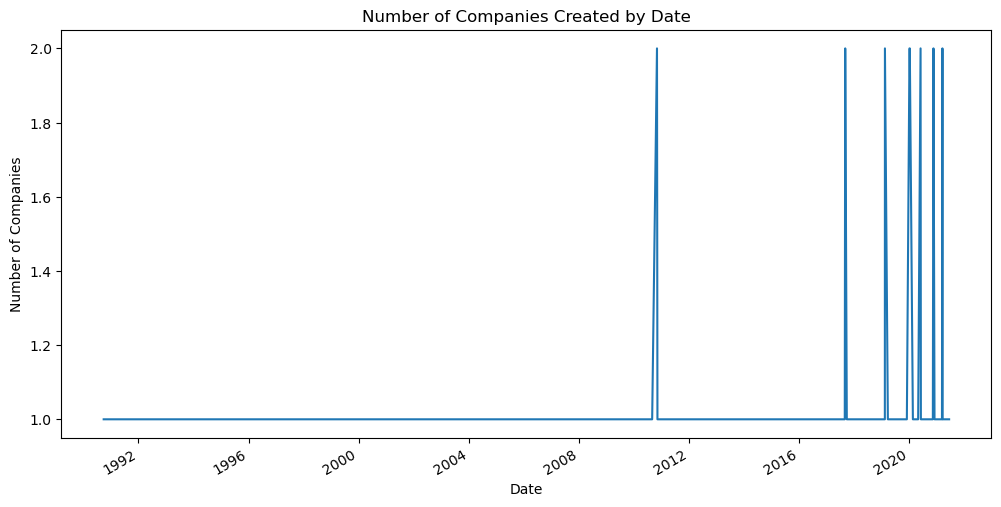

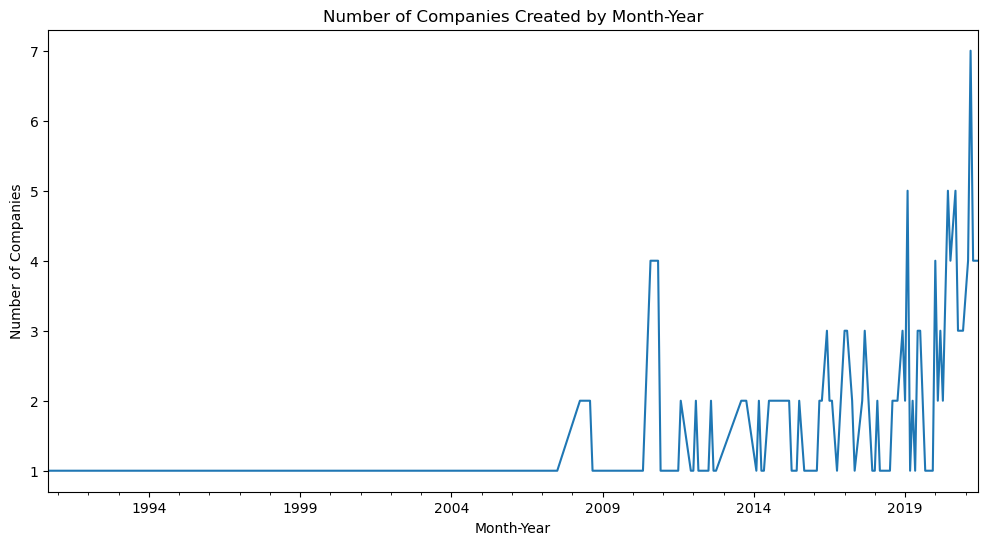

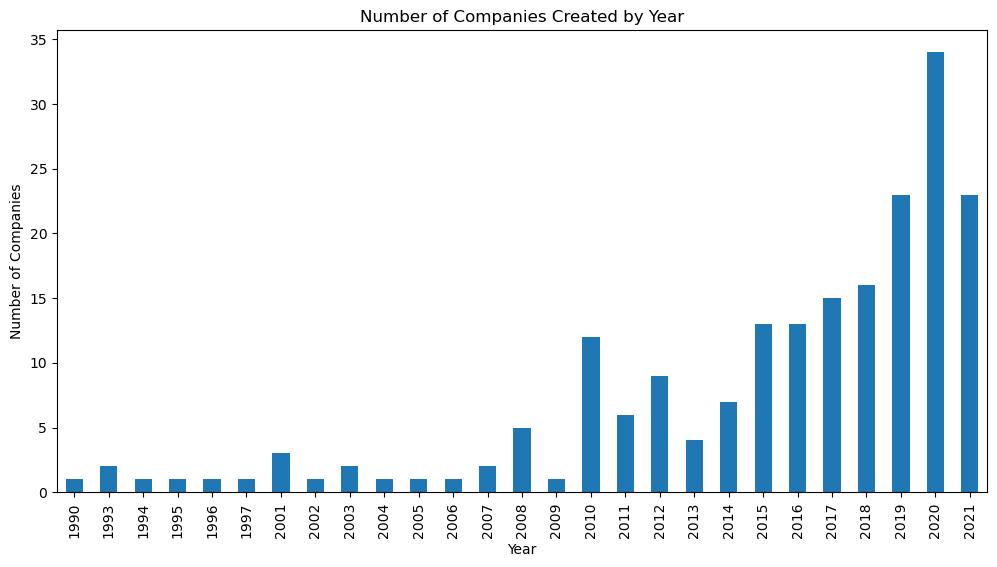

In [142]:
import matplotlib.pyplot as plt

# What is the number of companies created by date, month year in Paraná?
#time series
df['opening_date'].value_counts().sort_index().plot(figsize=(12,6))
plt.title("Number of Companies Created by Date")
plt.ylabel('Number of Companies')
plt.xlabel('Date')
plt.show()


df.groupby(df['opening_date'].dt.to_period("M")).size().plot(figsize=(12,6))
plt.title("Number of Companies Created by Month-Year")
plt.ylabel('Number of Companies')
plt.xlabel('Month-Year')
plt.show()

df.groupby(df['opening_date'].dt.year).size().plot(kind='bar', figsize=(12,6))
plt.title("Number of Companies Created by Year")
plt.ylabel('Number of Companies')
plt.xlabel('Year')
plt.show()

In [144]:
#Does the number of branches for a CNPJ provided on the dataset is equal to the actual number produced by the dataset?
#------------------TO INVESTIGATE
actual_branches = df['cnpj_basico'].nunique()
given_branches = df['tot_branches'].sum()

print(f"Given branches in dataset: {given_branches}")
print(f"Actual branches based on unique document numbers: {actual_branches}")

Given branches in dataset: 211.0
Actual branches based on unique document numbers: 197


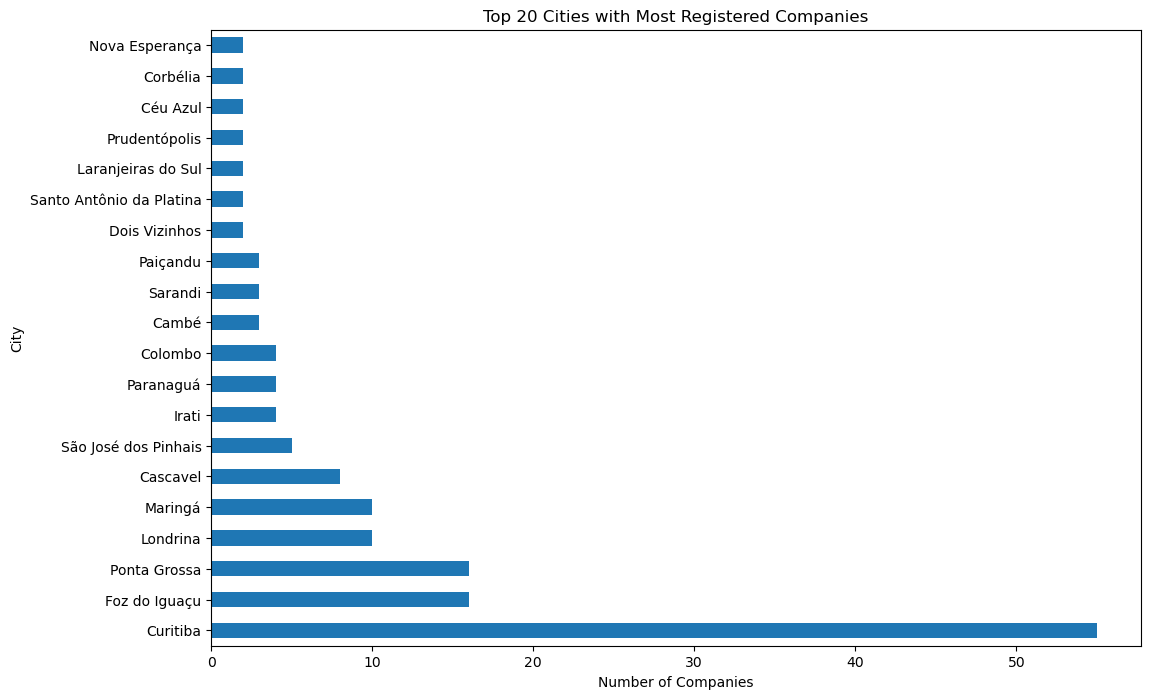

In [145]:
#What cities in Paraná have the higest number of registered companies?
top_cities = df['city'].value_counts().head(20)
top_cities.plot(kind='barh', figsize=(12,8))
plt.title("Top 20 Cities with Most Registered Companies")
plt.ylabel('City')
plt.xlabel('Number of Companies')
plt.show()